In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data_initial = pd.read_csv("diabetes_prediction_dataset.csv")
train_data_initial.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
train_data = train_data_initial.copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
from ydata_profiling import ProfileReport

In [5]:
report = ProfileReport(train_data, title='info', sensitive= False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Из визуальной оценки данных: пропуски присутствуют, но в качестве таких категорий, как "Others" или "Not info", к тому же есть дубликаты строк. Наблюдается сильный дисбаланс в большинстве фич. Так же есть ощутимая корреляция между фичами HbA1c_level, blood_glucose_level с таргетовой переменной, скорее всего это говорит о важности данных фич. 

In [6]:
train_data.drop_duplicates(inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [7]:
women = train_data.loc[train_data.gender == 'Female']["diabetes"]
print("% of women who ill:", sum(women)/len(women))

men = train_data.loc[train_data.gender == 'Male']["diabetes"]
print("% of men who ill:", sum(men)/len(men))

% of women who ill: 0.07918306297964779
% of men who ill: 0.10095829058973653


In [8]:
group1 = train_data.loc[train_data.hypertension == 0]["diabetes"]
print("% of people who haven't hypertension:", sum(group1)/len(group1))

group2 = train_data.loc[train_data.hypertension == 1]["diabetes"]
print("% of people who have hypertension:", sum(group2)/len(group2))

% of people who haven't hypertension: 0.0721204262276597
% of people who have hypertension: 0.27958718670419513


In [9]:
group1 = train_data.loc[train_data.heart_disease == 0]["diabetes"]
print("% of people who haven't heart disease:", sum(group1)/len(group1))

group2 = train_data.loc[train_data.heart_disease == 1]["diabetes"]
print("% of people who have heart disease:", sum(group2)/len(group2))

% of people who haven't heart disease: 0.07823427995185583
% of people who have heart disease: 0.32296711700229414


In [10]:
group1 = train_data.loc[train_data.gender == "Other"]["age"]
print(group1)

12669    10.0
14838    19.0
16702    39.0
18691    10.0
23266    23.0
31985    53.0
33805    45.0
34929    47.0
35006    47.0
40337    18.0
56238    10.0
66595    55.0
66887    19.0
67204     7.0
68484    52.0
71139    28.0
75302    26.0
75734    24.0
Name: age, dtype: float64


Некоторые замечания: корреляция пола и наличия заболевания очень мала и там присутствуют пропуски, поэтому лучше не рассматривать этот столбец. "Hypertension" и "heart disease" имеют неплохую корееляцию, поэтому оставим. Остальные фичи имеют более высокую корреляцию, исходя из report-а. Однако "smoking history" имеет около половины пропусков и корреляция слабее, вероятнее всего этот столбец исказит достоверность предсказаний. Теперь подготовим данные для модели.

In [11]:
train_data.drop(columns=['gender', 'smoking_history'], inplace = True)
train_data.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1
7,79.0,0,0,23.86,5.7,85,0
8,42.0,0,0,33.64,4.8,145,0
9,32.0,0,0,27.32,5.0,100,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import catboost as cb

In [13]:
X = train_data.drop(columns='diabetes')
y = train_data['diabetes']

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=7, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_test1, y_test1, test_size=0.5, stratify=y_test1, random_state=7, shuffle=True)

model = cb.CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

0.9707213063601852
VALID
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17533
           1       0.96      0.70      0.81      1696

    accuracy                           0.97     19229
   macro avg       0.97      0.85      0.90     19229
weighted avg       0.97      0.97      0.97     19229

TRAIN
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     52598
           1       1.00      0.74      0.85      5089

    accuracy                           0.98     57687
   macro avg       0.99      0.87      0.92     57687
weighted avg       0.98      0.98      0.98     57687



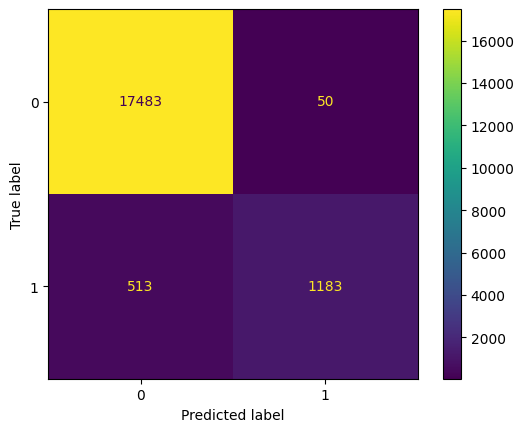

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, hamming_loss

print(accuracy_score(list(y_valid), y_pred_valid, normalize=True, sample_weight=None))
print("VALID")
print(classification_report(list(y_valid), y_pred_valid))
print("TRAIN")
print(classification_report(list(y_train), model.predict(X_train)))

cfm = confusion_matrix(list(y_valid), model.predict(X_valid))
ConfusionMatrixDisplay(cfm, display_labels=[0, 1]).plot()

plt.show()

Accuracy высокий казалось бы, но в данной задаче выжнее recall. Добавим в классификатор параметр, чтобы он рассматривал классы сбалансировано.

In [19]:
model_balanced = cb.CatBoostClassifier(verbose=0, auto_class_weights='Balanced')
model_balanced.fit(X_train, y_train)

y_pred_valid_bal2 = model_balanced.predict(X_valid)
y_pred_test_bal = model_balanced.predict(X_test)

0.9199126319621406
VALID
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17533
           1       0.53      0.89      0.66      1696

    accuracy                           0.92     19229
   macro avg       0.76      0.91      0.81     19229
weighted avg       0.95      0.92      0.93     19229

TRAIN
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     52598
           1       0.56      0.97      0.71      5089

    accuracy                           0.93     57687
   macro avg       0.78      0.95      0.83     57687
weighted avg       0.96      0.93      0.94     57687



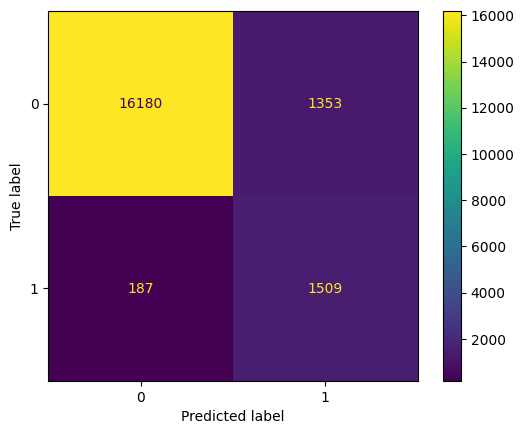

In [25]:
print(accuracy_score(list(y_valid), y_pred_valid_bal2, normalize=True, sample_weight=None))
print("VALID")
print(classification_report(list(y_valid), y_pred_valid_bal2))
print("TRAIN")
print(classification_report(list(y_train), model_balanced.predict(X_train)))

cfm_balanced = confusion_matrix(y_valid.tolist() , y_pred_valid_bal2.tolist())
ConfusionMatrixDisplay(cfm_balanced, display_labels=[0, 1]).plot()

plt.show()

Попробуем теперь подобрать гиперпараметры при помощи RandomizedSearchCV и посмотрим как изменится результат.

In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid_space={'depth':[3,5,10,None],
              'iterations':[500,1000,1500],
              'min_data_in_leaf':[1,2,3],
              'learning_rate':[0.01, 0.03, 0.05]
           }

grid = GridSearchCV(model_balanced,param_grid=grid_space,cv=3,scoring='recall')
model_grid = grid.fit(X_valid,y_valid)

print('Best hyperparameters are: ' + str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Best hyperparameters are: {'depth': 3, 'iterations': 1000, 'learning_rate': 0.01, 'min_data_in_leaf': 1}
Best score is: 0.9262870425383324


0.9013469239170003
VALID
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     17533
           1       0.47      0.93      0.63      1696

    accuracy                           0.90     19229
   macro avg       0.73      0.92      0.78     19229
weighted avg       0.95      0.90      0.92     19229

TRAIN
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     52598
           1       0.46      0.93      0.62      5089

    accuracy                           0.90     57687
   macro avg       0.73      0.91      0.78     57687
weighted avg       0.95      0.90      0.91     57687



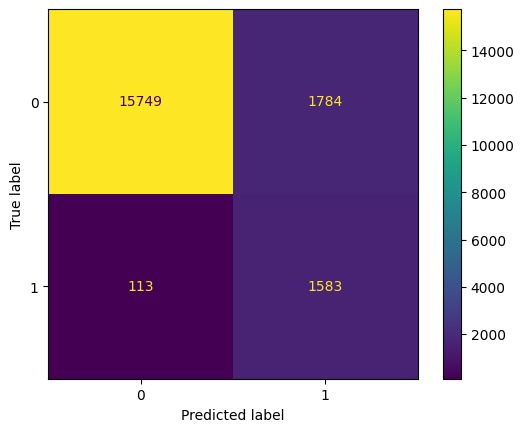

In [32]:
model_balanced_opt = cb.CatBoostClassifier(verbose=0, auto_class_weights='Balanced', depth=3, iterations=1000, learning_rate=0.01, min_data_in_leaf=1)
model_balanced_opt.fit(X_train, y_train)

y_pred_valid_bal_opt = model_balanced_opt.predict(X_valid)

print(accuracy_score(list(y_valid), y_pred_valid_bal_opt, normalize=True, sample_weight=None))
print("VALID")
print(classification_report(list(y_valid), y_pred_valid_bal_opt))
print("TRAIN")
print(classification_report(list(y_train), model_balanced_opt.predict(X_train)))

cfm_balanced_opt = confusion_matrix(y_valid.tolist() , y_pred_valid_bal_opt.tolist())
ConfusionMatrixDisplay(cfm_balanced_opt, display_labels=[0, 1]).plot()

plt.show()

Recall поднялся до неплохого уровня и на тренировочной, и на валидационной выборке. Однако precision сильно упал, а вместе с ним и f1-score. Причем оптимизация параметров не сильно улучшило recall, а для тренировочной выборки еще и ухудшила. Попробуем теперь улучшить результаты по f1-score.

0.9199126319621406
VALID
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17533
           1       0.53      0.89      0.66      1696

    accuracy                           0.92     19229
   macro avg       0.76      0.91      0.81     19229
weighted avg       0.95      0.92      0.93     19229

TRAIN
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     52598
           1       0.56      0.97      0.71      5089

    accuracy                           0.93     57687
   macro avg       0.78      0.95      0.83     57687
weighted avg       0.96      0.93      0.94     57687



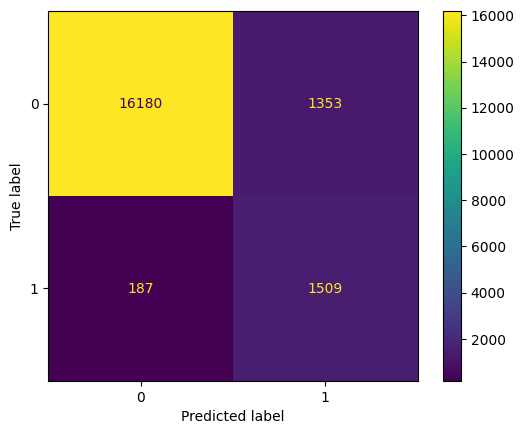

In [38]:
model_balanced_f1 = cb.CatBoostClassifier(verbose=0, auto_class_weights='Balanced', eval_metric='TotalF1' )
model_balanced_f1.fit(X_train, y_train)

y_pred_valid_bal_f1 = model_balanced_f1.predict(X_valid)

print(accuracy_score(list(y_valid), y_pred_valid_bal_f1, normalize=True, sample_weight=None))
print("VALID")
print(classification_report(list(y_valid), y_pred_valid_bal_f1))
print("TRAIN")
print(classification_report(list(y_train), model_balanced_f1.predict(X_train)))

cfm_balanced_f1 = confusion_matrix(y_valid.tolist() , y_pred_valid_bal_f1.tolist())
ConfusionMatrixDisplay(cfm_balanced_f1, display_labels=[0, 1]).plot()

plt.show()

In [41]:
grid_f1 = GridSearchCV(model_balanced,param_grid=grid_space,cv=3,scoring='f1')
model_grid_f1 = grid_f1.fit(X_valid,y_valid)

print('Best hyperparameters are: ' + str(model_grid_f1.best_params_))
print('Best score is: ' + str(model_grid_f1.best_score_))

Best hyperparameters are: {'depth': 10, 'iterations': 1500, 'learning_rate': 0.05, 'min_data_in_leaf': 1}
Best score is: 0.7584125864929673


0.9417026366425711
VALID
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17533
           1       0.64      0.78      0.70      1696

    accuracy                           0.94     19229
   macro avg       0.81      0.87      0.83     19229
weighted avg       0.95      0.94      0.94     19229

TRAIN
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52598
           1       0.83      1.00      0.90      5089

    accuracy                           0.98     57687
   macro avg       0.91      0.99      0.95     57687
weighted avg       0.98      0.98      0.98     57687



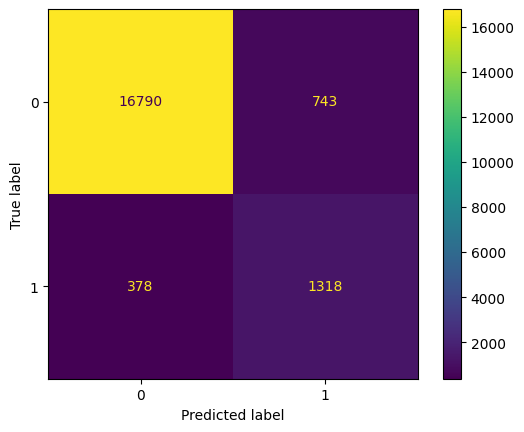

In [42]:
model_balanced_f1_opt = cb.CatBoostClassifier(verbose=0, auto_class_weights='Balanced', depth=10, iterations=1500, learning_rate=0.05, min_data_in_leaf=1)
model_balanced_f1_opt.fit(X_train, y_train)

y_pred_valid_bal_f1_opt = model_balanced_f1_opt.predict(X_valid)

print(accuracy_score(list(y_valid), y_pred_valid_bal_f1_opt, normalize=True, sample_weight=None))
print("VALID")
print(classification_report(list(y_valid), y_pred_valid_bal_f1_opt))
print("TRAIN")
print(classification_report(list(y_train), model_balanced_f1_opt.predict(X_train)))

cfm_balanced_f1_opt = confusion_matrix(y_valid.tolist() , y_pred_valid_bal_f1_opt.tolist())
ConfusionMatrixDisplay(cfm_balanced_f1_opt, display_labels=[0, 1]).plot()

plt.show()

In [43]:
model_balanced_f1_opt.get_feature_importance()

array([14.03681432,  2.01966973,  1.29787026, 12.4079004 , 37.04129785,
       33.19644745])

Отсюда видно, что некоторые признаки в значительно меньшей степени были интересны модели, уберем их и посмотрим как изменится результат.

In [45]:
X_opt = X.copy()
X_opt.drop(columns=['hypertension', 'heart_disease'], inplace = True)
X_opt.head(10)

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155
5,20.0,27.32,6.6,85
6,44.0,19.31,6.5,200
7,79.0,23.86,5.7,85
8,42.0,33.64,4.8,145
9,32.0,27.32,5.0,100


0.9153362109314057
VALID
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17533
           1       0.51      0.89      0.65      1696

    accuracy                           0.92     19229
   macro avg       0.75      0.90      0.80     19229
weighted avg       0.95      0.92      0.93     19229

TRAIN
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     52598
           1       0.55      0.97      0.70      5089

    accuracy                           0.93     57687
   macro avg       0.77      0.95      0.83     57687
weighted avg       0.96      0.93      0.94     57687



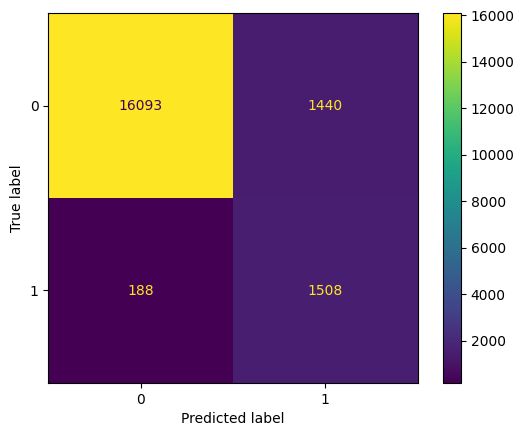

In [51]:
X_train_opt, X_test1_opt, y_train_opt, y_test1_opt = train_test_split(X_opt, y, test_size=0.4, stratify=y, random_state=7, shuffle=True)
X_valid_opt, X_test_opt, y_valid_opt, y_test_opt = train_test_split(X_test1_opt, y_test1_opt, test_size=0.5, stratify=y_test1_opt, random_state=7, shuffle=True)

model_balanced_f1_X_opt = cb.CatBoostClassifier(verbose=0, auto_class_weights='Balanced', depth=10, iterations=2000, learning_rate=0.01, min_data_in_leaf=1)
model_balanced_f1_X_opt.fit(X_train_opt, y_train_opt)

y_pred_valid_bal_f1_X_opt = model_balanced_f1_X_opt.predict(X_valid_opt)

print(accuracy_score(list(y_valid_opt), y_pred_valid_bal_f1_X_opt, normalize=True, sample_weight=None))
print("VALID")
print(classification_report(list(y_valid_opt), y_pred_valid_bal_f1_X_opt))
print("TRAIN")
print(classification_report(list(y_train_opt), model_balanced_f1_X_opt.predict(X_train_opt)))

cfm_balanced_f1_X_opt = confusion_matrix(y_valid_opt.tolist() , y_pred_valid_bal_f1_X_opt.tolist())
ConfusionMatrixDisplay(cfm_balanced_f1_X_opt, display_labels=[0, 1]).plot()

plt.show()

0.8986479459178367
TEST
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     17533
           1       0.46      0.93      0.62      1697

    accuracy                           0.90     19230
   macro avg       0.73      0.91      0.78     19230
weighted avg       0.95      0.90      0.91     19230

TRAIN
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     52598
           1       0.46      0.93      0.62      5089

    accuracy                           0.90     57687
   macro avg       0.73      0.91      0.78     57687
weighted avg       0.95      0.90      0.91     57687



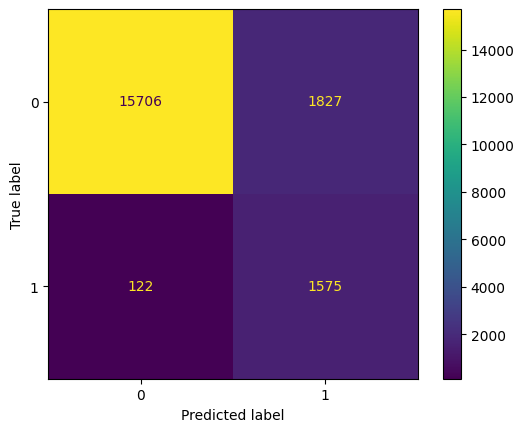

In [52]:
print(accuracy_score(list(y_test), model_balanced_opt.predict(X_test), normalize=True, sample_weight=None))
print("TEST")
print(classification_report(list(y_test), model_balanced_opt.predict(X_test)))
print("TRAIN")
print(classification_report(list(y_train), model_balanced_opt.predict(X_train)))

cfm_balanced_opttest = confusion_matrix(y_test.tolist() , model_balanced_opt.predict(X_test).tolist())
ConfusionMatrixDisplay(cfm_balanced_opttest, display_labels=[0, 1]).plot()

plt.show()